### Cosas por hacer
- [ x ] Crear repositorio en github
    - https://github.com/nicocernadas/Proyecto-Cernadas-Correa.git

### DataFrame
- [ x ] Elegir el DataFrame
    - [ x ] Analizar columnas
    - [  ] Correlaciones entre columnas
    - [  ] Factibilidad
        - _Es adecuada para una red neuronal de clasificacion?_
        - _Explicar el proposito de la red_
    - [ x ] Datos atípicos y limpieza
    - [  ] Transformaciones preliminares
        - _Normalizacion, conversion de valores numericos..._

### Red Neuronal
- [  ] Dibujar arquitectura
    - _Capas, neuronas por capa, funciones de activacion..._
- [  ] Implementacion en Numpy
    - _Inicializacion de pesos, calculo de activaciones, funcion costo, algoritmo de backpropagation y ajuste de los pesos mediante descenso de gradiente estocástico_
- [  ] Entrenamiento y Evaluacion
    - [  ] Entrenar la base seleccionada
    - [  ] Trazar las curvas de precision y la funcion perdida
- [  ] Analisis de Overfitting
    - _Analizar posible overfitting_

### Scikit-Learn
- [ ] Implementacion de una red neuronal mediante el uso de la libreria scikit-learn.
- [ ] Comparar rendimientos
    - _En que aspectos son similares? En cuales diferentes?_

### Conclusion final
- [ ] Reporte de reflexiones

### ANALISIS DE LA BASE DE DATOS

#### 1) Descripcion de columnas

**Variables categóricas**
- **Potability**: Potabilidad del agua.
    - **Descripción**: Indica si el agua es potable con valores 1 (potable) y 0 (no potable).

**Variables continuas**
- **pH**: Mide el nivel de acidez o alcalinidad del agua.
    - **Descripción**: Se define como la concentración de iones de hidrógeno en el agua. La escala del pH es logarítmica con valores de 0 a 14.
- **Hardness**: Mide la dureza del agua.
    - **Descripción**: En química, el agua calcárea o agua dura —por contraposición al agua blanda— es aquella que contiene un alto nivel de minerales, en particular sales de magnesio y calcio.​ A veces se da como límite para denominar a un agua como dura una dureza superior a 120 mg/L.
- **Solids**: Representa los sólidos en el agua.
    - **Descripción**: Sólidos totales disueltos y no disueltos.
- **Chloramines**: Indica la concentración de cloraminas en el agua.
    - **Descripción**: La cloración tiene como objetivo principal eliminar o inactivar microorganismos patógenos, como bacterias, virus y parásitos, que podrían estar presentes en el agua y que podrían causar enfermedades si son ingeridos.
- **Sulfate**: Mide la concentración de sulfato en el agua.
    - **Descripción**: Los sulfatos son una mezcla de oxígeno y azufre y son partes de las sustancias existentes en algunas formaciones de rocas y suelos que incorporan agua subterránea. El mineral se convierte gradualmente en una solución y se libera al agua subterránea.
- **Conductivity**: Mide la capacidad del agua para conducir electricidad.
    - **Descripción**: Las sales disueltas en agua se descomponen en iones cargados positivamente y negativamente. La conductividad se define como la capacidad del agua para conducir una corriente eléctrica a travéde los iones disueltos. Los iones más positivos son sodio (Na+), calcio (Ca+2), potasio (K+) y magnesio (Mg+2).
- **Organic_carbon**: Representa el contenido de carbono orgánico en el agua.
    - **Descripción**: El carbono orgánico total es la medida de todo el carbono que contiene la materia orgánica disuelta o particulada presente en la muestra de agua. El origen de esta materia orgánica presente en el agua son, principalmente, sustancias vegetales o animales del acuífero utilizado para captar el agua o contaminaciones que se producen en el sistema de distribución. Su presencia por encima de los valores establecidos es un indicio de un exceso de materia orgánica en el agua, que al reaccionar con los agentes desinfectantes utilizados en la potabilización, como el cloro, pueden dar lugar a subproductos de la desinfección nocivos para la salud.
- **Trihalomethanes**: Mide la concentración de trihalometanos en el agua.
    - **Descripción**: Los trihalometanos son unos subproductos de la desinfección que se forman cuando se emplea el cloro como desinfectante. Los trihalometanos que se encuentran en el agua de consumo humano son el cloroformo, el bromodiclorometano, el dibromoclorometano y el bromoformo.
- **Turbidity**: Mide el nivel de turbidez del agua.
    - **Descripción**: La turbidez es una medida de la cantidad de partículas en suspensión en el agua. Las algas, los sedimentos en suspensión, la materia orgánica y los contaminantes pueden enturbiar el agua.

#### Primero importamos las librerias, y cargamos el DataFrame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('water_potability.csv', sep=',')
df.fillna(df.mean(), inplace=True)

#### 2) Analisis de Correlaciones

Aca me mato

#### 3) Factibilidad del Data Set

a)

b) La red dirá, en base a los datos suministrados, si un agua es potable o no. Al pasarle a la red el pH, solidos en el agua, minerales... será capaz de determinar si un agua es o no dañina para el cuerpo humano.


#### 4) Datos Atipicos y Limpieza de Datos

- Identificacion de Datos Atipicos

    El siguiente codigo define una funcion que recibe como parametro una determinada columna de un Data Frame.
    Obtiene los cuartiles y arma una lista con los valores atipicos, la cual retorna para el siguiente paso.

In [ ]:
def atipicos_col(col_name):
    sample_ordenado = sorted(col_name)
    n = len(sample_ordenado)

    # Cuartiles
    Q1 = sample_ordenado[n // 4]
    Q2 = (sample_ordenado[n // 2 - 1] + sample_ordenado[n // 2]) / 2
    Q3 = sample_ordenado[3 * n // 4]
    iqr = Q3 - Q1

    print('Cuantiles', )
    print('Valores mayores a: ', Q3 + (1.5 * iqr), ' => Son atipicos')
    print('Valores menores a: ',Q1 - (1.5 * iqr), ' => Son atipicos')
    print('\n')

    atipicos = []

    # Calcula los valores atipicos
    for x in sample_ordenado:
        if (x > Q3 + (1.5 * iqr) or (x < Q1 - (1.5 * iqr))):
            atipicos.append(x)
        else:
            pass
    
    # Retorna la lista ordenada para despues armar el nuevo dataframe.
    return atipicos

- Limpieza de los datos

    Esta funcion recibe el dataframe y arma una lista con sus columnas.
    
    En un bucle, llama a la funcion definida anteriormente, y le pasa como parametro el la primer columna de la lista de columnas del dataframe que recibió como parametro.

    Una vez que finaliza la funcion y ya tenemos la lista de datos atipicos, genera otro bucle, y emplea la funcion .loc[] de Pandas, para intercambiar los items de la lista de 'atipicos' por 'nan' en la misma columna.

    Esto se repetira para todas las columnas del DataFrame 

In [ ]:
def limpieza_col(data_frame):
    columnas = data_frame.columns
    atipicos = 0

    for item in columnas:
        atipicos = atipicos_col(data_frame[item])
        for x in atipicos:
            data_frame.loc[data_frame[item] == x, item] = np.nan

    return data_frame

Y se llama la funcion para realizar toda la limpieza

In [ ]:
df = limpieza_col(df)

### RED NEURONAL

#### Arquitectura de la red

- Vistazo de lo que se me ocurrio para hacer

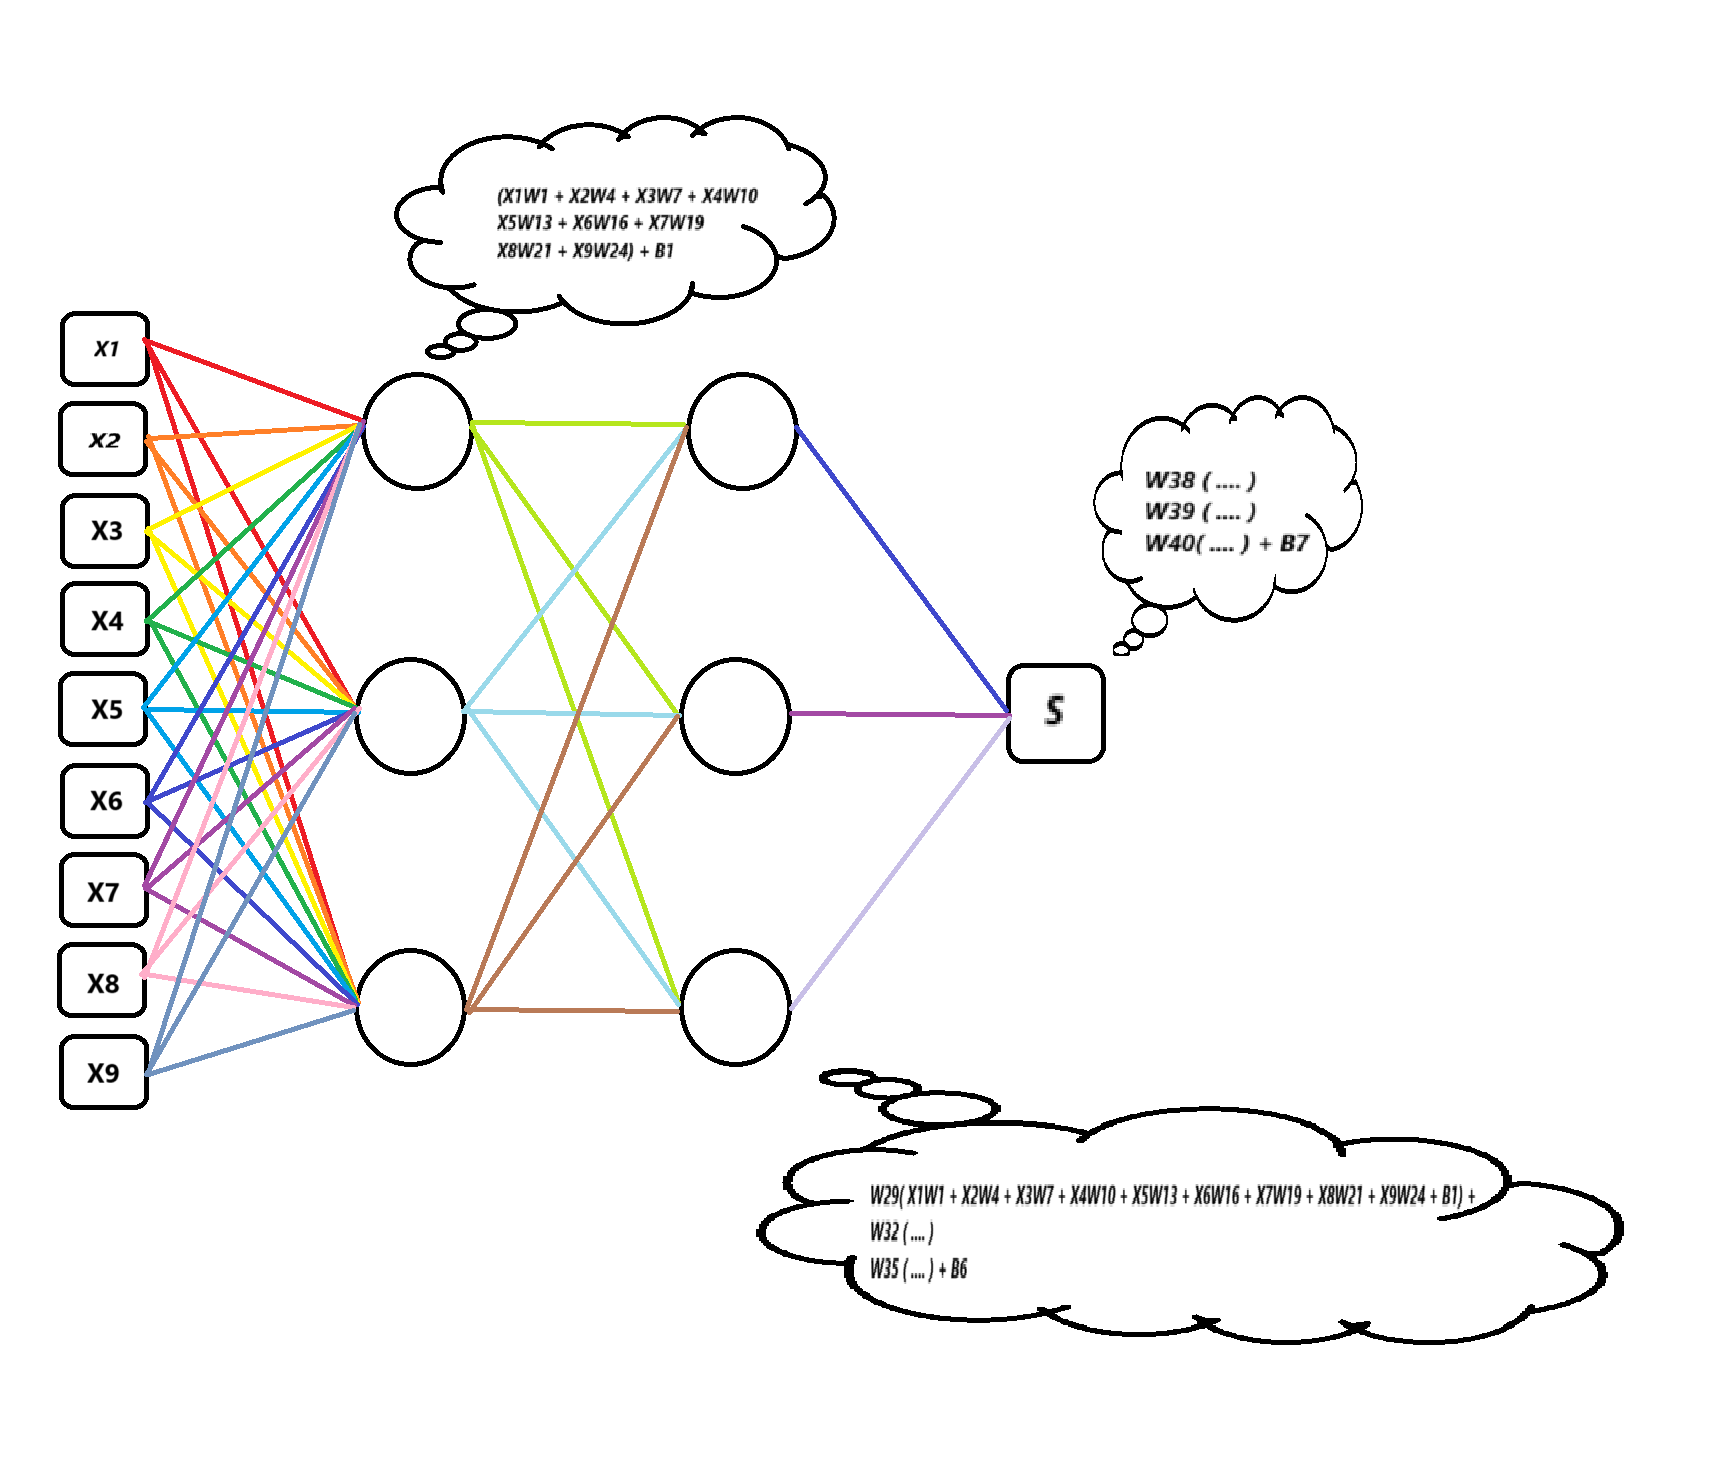

- Capas
    - La red dispondria de 3 capas: 1 de entrada, 2 ocultas y 1 de salida.

- Neuronas
    - En la capa de entrada habra tantas neuronas como columnas (datos de entrada), en las 2 del medio 3 neuronas en cada una (ni idea, preguntar) y en la ultima 1 sola, ya que es 1 si es potable, y 0 si no lo es

- Funciones de Activacion
    - ReLu en las ocultas, Sigmoide en la de salida